# Homework Week 7

For each problem state:

the null and alternative hypotheses, whether the test is a one-tail or two-tailed test, conduct the appropriate test and the tests assumptions, state and support your conclusions.  Assume the outcome variable is ~N(μ,σ2) and α = .05.

Also evaluate the data based on the material reviewed in class, does the data seem to follow a normal distribution? are there outliers that could affect the data? if there are multiple samples do they have equal variance, does the data need to be transformed?

Not everything needs to be applied to every dataset, however, you must judge what are the most relevant plots or analysis to draw conclusions from the data based on the hypothesis.

### A.

A random sample of 30 employes from a large financial organization has been selected to evaluate their learning performance after a series of seminars. Each subject was given a test that has a national average score of 50. Has the seminar programs statistically improved the scores of the employes?

These are the scores:

02 54 69 47 66 44 56 55 67 47 58 39 42 45 72 72 69 75 57 54 34 62 50 58 48 63
74 45 71 59

[1] 55.13333

[1] 15.08992

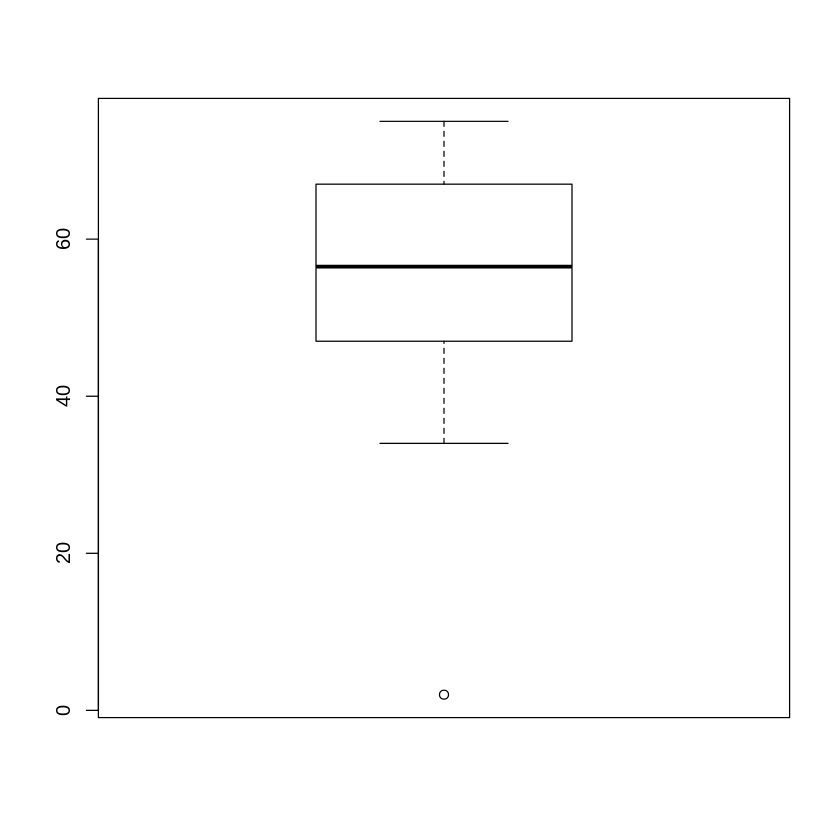

In [1]:
learning_performance = c(02,54,69,47,66,44,56,55,67,47,58,39,42,45,72,72,69,75,57,54,34,62,50,58,48,63,74,45,71,59)

mean(learning_performance)
sd(learning_performance)
boxplot(learning_performance)

In [2]:
eq = replicate(10000, t.test(learning_performance)$p.value)

In [3]:
mean(eq)

[1] 1.615611e-18

In [4]:
#This p value result indicates that this sample is highly significant
#and that the seminars have statistically
#improved the scores of the employees

### B. 

A study looked at various cardiovascular risk factors in children, as measured at birth and during their first five years of life. One of the results for newborns were to study differences in bits per minute from two different races.
Based on the data, Is there evidence that the number of heart beats/min of newborn white children is fewer than that of newborn black children? 

The data is located in this working directory with the name Cardiovascular_children.csv

In [5]:
CV_Children = read.csv("Cardiovascular_children.csv", header = T)

In [6]:
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(data.table)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [7]:
CV.Children.race <-
  CV_Children %>%
  group_by(race, bpm) %>%
  filter(race != "NA")

In [8]:
white = c("white")
black = c("black")

white_bpm = subset(CV.Children.race, race %in% white)
black_bpm = subset(CV.Children.race, race %in% black)

sum(white_bpm$bpm)/length(white_bpm$bpm)
sum(black_bpm$bpm)/length(black_bpm$bpm)

[1] 121.2893

[1] 133.68

In [9]:
mean(white_bpm$bpm)
sd(white_bpm$bpm)
mean(black_bpm$bpm)
sd(black_bpm$bpm)

[1] 121.2893

[1] 10.70781

[1] 133.68

[1] 9.546902

In [10]:
var.test(white_bpm$bpm,black_bpm$bpm)


	F test to compare two variances

data:  white_bpm$bpm and black_bpm$bpm
F = 1.258, num df = 120, denom df = 24, p-value = 0.5264
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6258819 2.2137149
sample estimates:
ratio of variances 
          1.257989 


In [11]:
qf(0.95, 120, 24)

[1] 1.789642

In [12]:
t.test(white_bpm$bpm,black_bpm$bpm, var.equal=TRUE, paired=FALSE)


	Two Sample t-test

data:  white_bpm$bpm and black_bpm$bpm
t = -5.3596, df = 144, p-value = 3.237e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.960321  -7.821167
sample estimates:
mean of x mean of y 
 121.2893  133.6800 


In [13]:
qt(0.975, 144)

[1] 1.976575

In [14]:
2*pt(1.98,144, lower = F)

[1] 0.04960958

In [ ]:
#the p value is less than 0.05, so that means we reject
#the null hypothesis.  Meaning that there is evidence that
#white newborn babies bpm's are less than black 
#newborn babies bpm; but just barely.

### C. 

A 1980 study was conducted whose purpose was to compare the indoor air quality in offices where smoking was permitted with that in offices where smoking was not permitted.  Measurements were made of carbon monoxide at 1:20 pm in work areas where smoking was permitted and in areas where smoking was prohibited with the following results:

Does CO vary differently in the two types of working environments?


The data is located in this working directory with the name smoking.csv

In [26]:
smoking = read.csv("smoking.csv", header = T)

In [27]:
Smoking <-
  smoking %>%
  group_by(permitted, prohibited) %>%
  filter(permitted != "NA") %>%
  filter(prohibited != "NA")

In [25]:
mean(Smoking$permitted)
sd(Smoking$permitted)
mean(Smoking$prohibited)
sd(Smoking$prohibited)

[1] 10.64

[1] 7.761443

[1] 6.36

[1] 1.933908

In [28]:
var.test(Smoking$permitted,Smoking$prohibited)


	F test to compare two variances

data:  Smoking$permitted and Smoking$prohibited
F = 16.107, num df = 24, denom df = 24, p-value = 2.341e-09
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  7.097833 36.551140
sample estimates:
ratio of variances 
          16.10695 


In [29]:
qf(0.95, 24, 24)

[1] 1.98376

In [30]:
t.test(Smoking$permitted,Smoking$prohibited, var.equal=TRUE, paired=FALSE)


	Two Sample t-test

data:  Smoking$permitted and Smoking$prohibited
t = 2.6754, df = 48, p-value = 0.01018
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.063487 7.496513
sample estimates:
mean of x mean of y 
    10.64      6.36 


In [31]:
qt(0.975, 48)

[1] 2.010635

In [32]:
2*pt(2.01,48, lower = F)

[1] 0.05006953

In [ ]:
#p value is greater than 0.05, so we accept the null
#hypothesis; meaning that there is no difference in CO levels
#in smoking permitted or smoking prohibited offices

### D. 

A study was conducted to investigate the effect of physical training on the serum cholesterol level.  Thirty subjects participated in the study.  Prior to training, blood samples were taken to determine the cholesterol level of each subject.  Then the subjects were put through a training program that centered on daily running and jogging.  At the end of the training period, blood samples were taken again and a second reading on the serum cholesterol level was obtained. Is there an effect of the training on cholesterol levels?

The data is located in this working directory with the name training.csv

In [33]:
training = read.csv("training.csv", header = T)
head(training)

Subject,Pre.training.level.x..mg.Dl.,Post.training.level.x..mg.Dl.,X,X.1,X.2
1,182,198,NA,NA,NA
2,232,210,NA,NA,NA
3,191,194,NA,NA,NA
4,210,210,NA,NA,NA
5,148,135,NA,NA,NA
6,249,220,NA,NA,NA


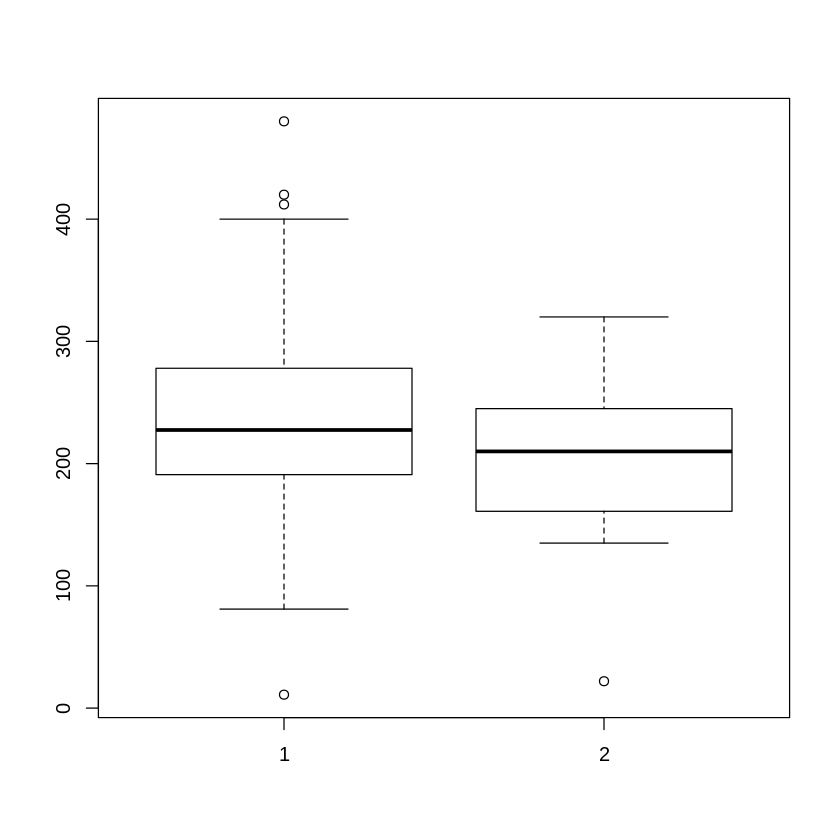

In [36]:
boxplot(training$Pre.training.level.x..mg.Dl.,training$Post.training.level.x..mg.Dl.)

In [37]:
t.test(training$Pre.training.level.x..mg.Dl.,training$Post.training.level.x..mg.Dl., paired=TRUE)


	Paired t-test

data:  training$Pre.training.level.x..mg.Dl. and training$Post.training.level.x..mg.Dl.
t = 2.2217, df = 29, p-value = 0.03427
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.996812 72.469854
sample estimates:
mean of the differences 
               37.73333 


In [38]:
install.packages("pwr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [39]:
library(pwr)
cohen.ES(test = "t", size = "medium")


     Conventional effect size from Cohen (1982) 

           test = t
           size = medium
    effect.size = 0.5


In [40]:
pwr.t.test(n = 30, d = 0.5, sig.level = 0.05)


     Two-sample t test power calculation 

              n = 30
              d = 0.5
      sig.level = 0.05
          power = 0.4778965
    alternative = two.sided

NOTE: n is number in *each* group


In [43]:
pwr.t.test(d = 0.5, power = 0.95, sig.level = 0.05) 


     Two-sample t test power calculation 

              n = 104.9279
              d = 0.5
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


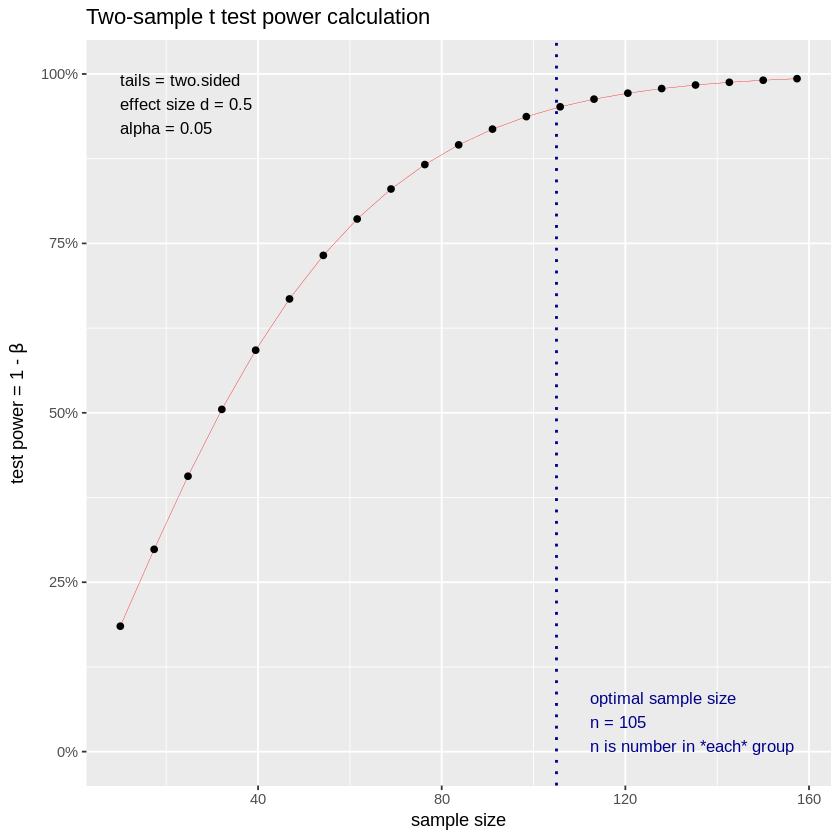

In [44]:
t.out <- pwr.t.test(d=0.5,
                    sig.level = 0.05, 
                    power = 0.95, alternative = "two.sided")
plot(t.out)

In [45]:
qt(0.975, 29)

[1] 2.04523

In [46]:
2*pt(2.01,29, lower = F)

[1] 0.05381511

In [ ]:
#Sample size is too small, optimal sample size is 105 patients.
#P value is greater than 0.05, so accept the null
#hypothesis; meaning that there is no statistically
#significant change in cholesterol levels after training.